<a href="https://colab.research.google.com/github/Hanan-1997/w-4/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Day_of_Week,Month,Day_of_Year,IsWeekend
count,19998.0,19998.0,19998.0,19998.0
mean,3.0,1.0,1.0,0.0
std,0.0,0.0,0.0,0.0
min,3.0,1.0,1.0,0.0
25%,3.0,1.0,1.0,0.0
50%,3.0,1.0,1.0,0.0
75%,3.0,1.0,1.0,0.0
max,3.0,1.0,1.0,0.0


In [ ]:
df.columns

Index(['Day_of_Week', 'Month', 'Day_of_Year', 'IsWeekend',
       'date_time_2016-11-18 15:00:00', 'date_time_2016-11-18 16:00:00',
       'date_time_2016-11-18 17:00:00', 'date_time_2016-11-18 18:00:00',
       'date_time_2016-11-18 19:00:00', 'date_time_2016-11-18 20:00:00',
       ...
       'traffic_volume_7074.0', 'traffic_volume_7107.0',
       'traffic_volume_7117.0', 'traffic_volume_7126.0',
       'traffic_volume_7139.0', 'traffic_volume_7149.0',
       'traffic_volume_7154.0', 'traffic_volume_7213.0',
       'traffic_volume_7280.0', 'traffic_volume_10309.0'],
      dtype='object', length=22025)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

<Axes: xlabel='date_time'>

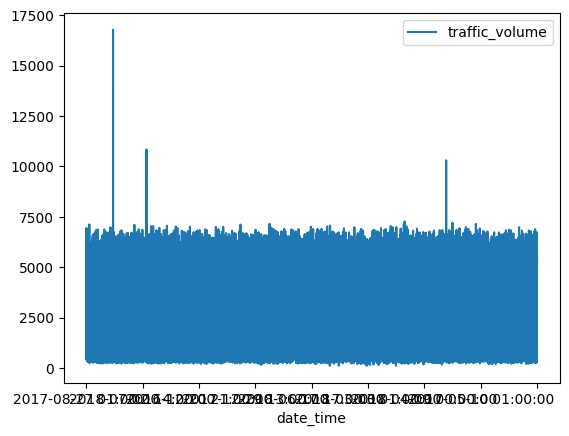

In [ ]:
df.plot(x='date_time',y='traffic_volume')

<Axes: >

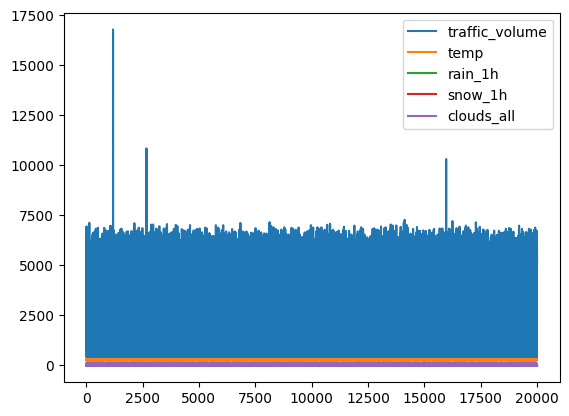

In [ ]:
df.plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df.sort_values(by='date_time',inplace=True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19998 entries, 1970-01-01 00:00:00.000007745 to 1970-01-01 00:00:00.000003795
Columns: 22025 entries, Day_of_Week to traffic_volume_10309.0
dtypes: bool(22021), int32(3), int64(1)
memory usage: 420.5 MB


In [ ]:
df.head()

,Day_of_Week,Month,Day_of_Year,IsWeekend,date_time_2016-11-18 15:00:00,date_time_2016-11-18 16:00:00,date_time_2016-11-18 17:00:00,date_time_2016-11-18 18:00:00,date_time_2016-11-18 19:00:00,date_time_2016-11-18 20:00:00,...,traffic_volume_7074.0,traffic_volume_7107.0,traffic_volume_7117.0,traffic_volume_7126.0,traffic_volume_7139.0,traffic_volume_7149.0,traffic_volume_7154.0,traffic_volume_7213.0,traffic_volume_7280.0,traffic_volume_10309.0
1970-01-01 00:00:00.000007745,3,1,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000004628,3,1,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000014496,3,1,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000008867,3,1,1,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000003867,3,1,1,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
# Verify if the column exists in your DataFrame
print(df.columns)
if 'prev_traffic_volume' in df.columns:
    df['prev_traffic_volume'] = df['prev_traffic_volume'].shift(1)
else:
    print("prev_traffic_volume' not found in DataFrame.")

Index(['Day_of_Week', 'Month', 'Day_of_Year', 'IsWeekend',
       'date_time_2016-11-18 15:00:00', 'date_time_2016-11-18 16:00:00',
       'date_time_2016-11-18 17:00:00', 'date_time_2016-11-18 18:00:00',
       'date_time_2016-11-18 19:00:00', 'date_time_2016-11-18 20:00:00',
       ...
       'traffic_volume_7074.0', 'traffic_volume_7107.0',
       'traffic_volume_7117.0', 'traffic_volume_7126.0',
       'traffic_volume_7139.0', 'traffic_volume_7149.0',
       'traffic_volume_7154.0', 'traffic_volume_7213.0',
       'traffic_volume_7280.0', 'traffic_volume_10309.0'],
      dtype='object', length=22025)
prev_traffic_volume' not found in DataFrame.


In [ ]:
df['Day_of_Week'] = df.index.day_of_week
df['Month'] = df.index.month
df['Day_of_Year'] = df.index.day_of_year
df['IsWeekend'] = df['Day_of_Week'].apply(lambda x: 1 if x in (5,6) else 0)

<ipython-input-56-4babba7c0efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_of_Week'] = df.index.day_of_week
<ipython-input-56-4babba7c0efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month
<ipython-input-56-4babba7c0efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df.isna().sum()

,0
Day_of_Week,0
Month,0
Day_of_Year,0
IsWeekend,0
date_time_2016-11-18 15:00:00,0
...,...
traffic_volume_7149.0,0
traffic_volume_7154.0,0
traffic_volume_7213.0,0
traffic_volume_7280.0,0


In [ ]:
# Now proceed with filling missing values
#df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(df['prev_traffic_volume'].mean())

In [1]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_volume'], label='Traffic Volume')
plt.plot(df.index, df['prev_traffic_volume'], label='Previous Day Traffic Volume')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

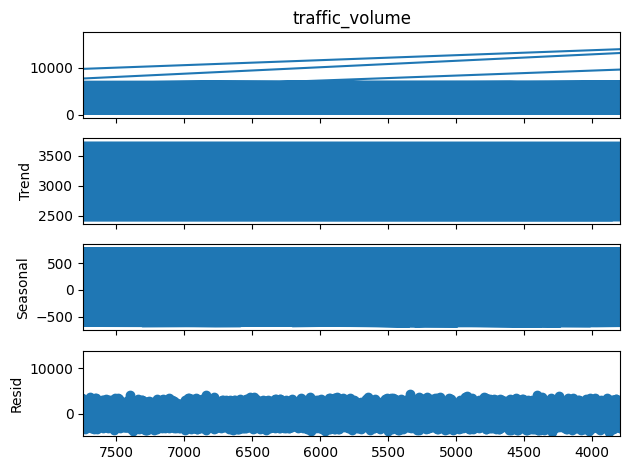

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Assuming the data is daily and you want to decompose it into a yearly cycle:
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
# Plot the decomposed components
result.plot()
plt.show()

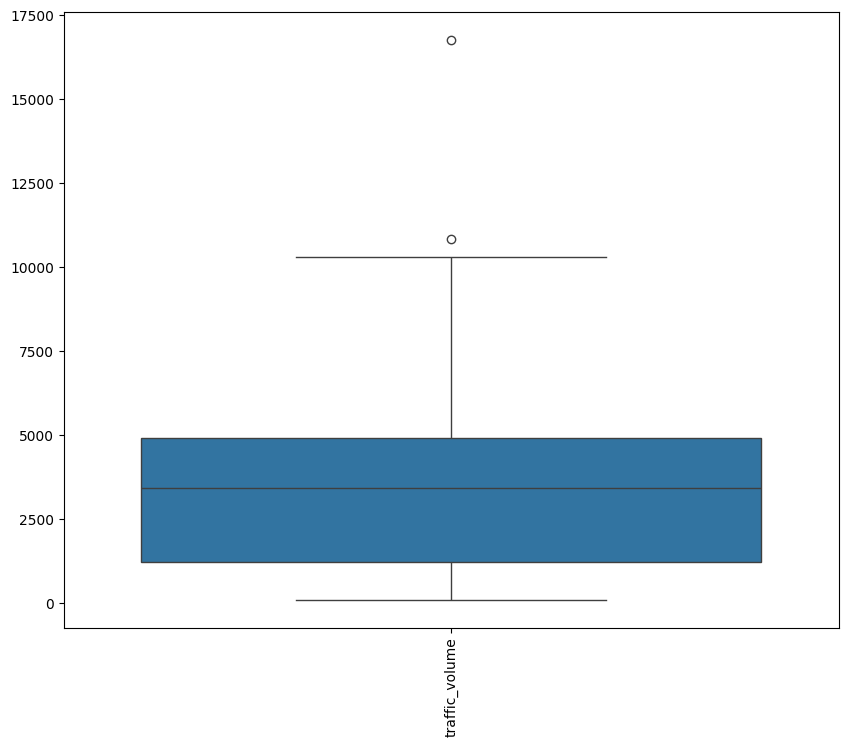

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def remove_outliers(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'traffic_volume') # Change the column name to an existing column

<ipython-input-43-e309c84f224b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume'] = df['traffic_volume'].fillna(df['traffic_volume'].mean())


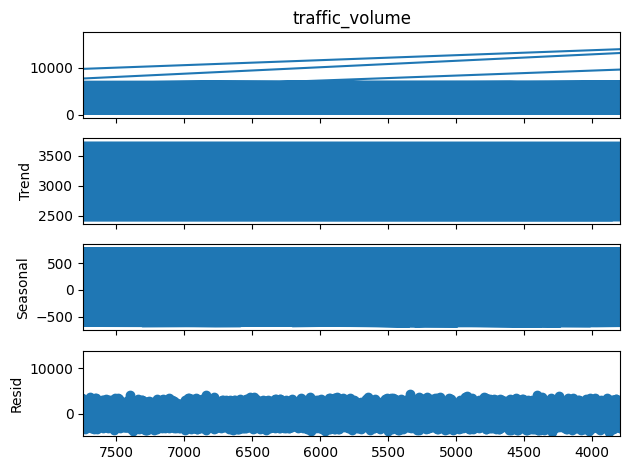

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Handle missing values (e.g., fill with the mean)
df['traffic_volume'] = df['traffic_volume'].fillna(df['traffic_volume'].mean())

# Perform seasonal decomposition
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)

# Plot the decomposed components
result.plot()
plt.show()

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
x=df.drop('traffic_volume',axis=1)
y=df['traffic_volume']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [ ]:
#encoding_columns=['weather_main','weather_description']

In [ ]:
encoding_columns=['date_time']
df=pd.get_dummies(df,columns=encoding_columns)


In [ ]:
encoding_columns=['traffic_volume']
df=pd.get_dummies(df,columns=encoding_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19998 entries, 1970-01-01 00:00:00.000007745 to 1970-01-01 00:00:00.000003795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       19998 non-null  object 
 1   traffic_volume  19998 non-null  float64
 2   Day_of_Week     19998 non-null  int32  
 3   Month           19998 non-null  int32  
 4   Day_of_Year     19998 non-null  int32  
 5   IsWeekend       19998 non-null  int64  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 859.3+ KB


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert 'date_time' to datetime objects
x_train['date_time'] = pd.to_datetime(x_train['date_time'])
x_test['date_time'] = pd.to_datetime(x_test['date_time'])

# Extract numerical features from datetime (e.g., hour, day, month)
x_train['hour'] = x_train['date_time'].dt.hour
x_train['day'] = x_train['date_time'].dt.day
x_train['month'] = x_train['date_time'].dt.month

x_test['hour'] = x_test['date_time'].dt.hour
x_test['day'] = x_test['date_time'].dt.day
x_test['month'] = x_test['date_time'].dt.month

# Drop original 'date_time' column
x_train = x_train.drop('date_time', axis=1)
x_test = x_test.drop('date_time', axis=1)

# Now apply MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU

# Create a Sequential model
model = Sequential()

# First RNN layer with 100 units, input shape, and return sequences
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Use 'model' instead of 'LT'

# Second RNN layer with 100 units and return sequences
model.add(LSTM(units=100, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 100 units
model.add(LSTM(units=100, activation='tanh'))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 7, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 7, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
compile_model = model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 10315903.0000 - val_loss: 10289478.0000
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 10191683.0000 - val_loss: 10100605.0000
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 10010057.0000 - val_loss: 9914756.0000
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 9727039.0000 - val_loss: 9731944.0000
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 9489419.0000 - val_loss: 9552232.0000
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 9313984.0000 - val_loss: 9375699.0000
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 9287259.0000 - val_loss: 9202159.0000
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 9181324.0000 - val_loss: 9031711.0000
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 9039788.0000 - val_loss: 8864399.0000
Epoch 10/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 8801024.0000 - val_loss: 8700470.0

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
y_pred  = y_pred.flatten()

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred_df.to_csv('/content/Traffic Data.csv', index=False)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
mea  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2474.886025203377


<Axes: >

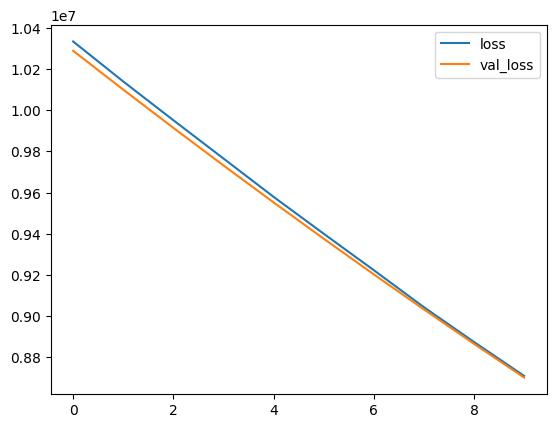

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred_df.to_csv('/content/Traffic Data.csv', index=False)

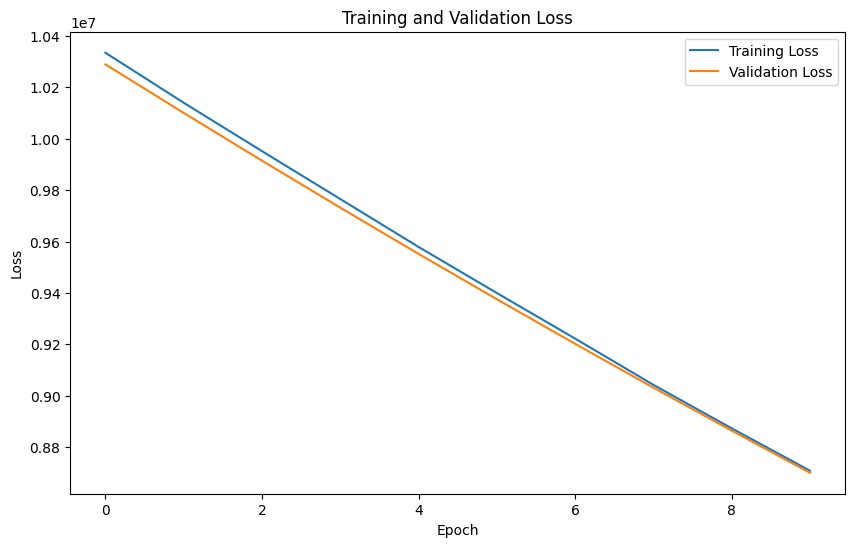

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU

# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)), # Use x_train instead of X_train
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming you also have x_test and y_train defined, replace X_test and y_train below accordingly
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 13987861.0000 - val_loss: 11346058.0000
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9785623.0000 - val_loss: 6212413.0000
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 5359218.0000 - val_loss: 4083316.2500
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4037126.7500 - val_loss: 3805761.2500
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3861548.2500 - val_loss: 3791541.0000
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 3856479.5000 - val_loss: 3789957.7500
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3922751.2500 - val_loss: 3789957.0000
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 3896406.0000 - val_loss: 3790717.5000
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3839560.7500 - val_loss: 3794196.0000
Epoch 10/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3832208.5000 - val_loss: 3793250.0000


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 7, 50)               │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,655 (287.72 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,104 (191.82 KB)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.evaluate(x_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3795746.5000


3793250.0

In [ ]:
predictions = model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
pridicted=pd.DataFrame(predictions,columns=['Predictions'])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

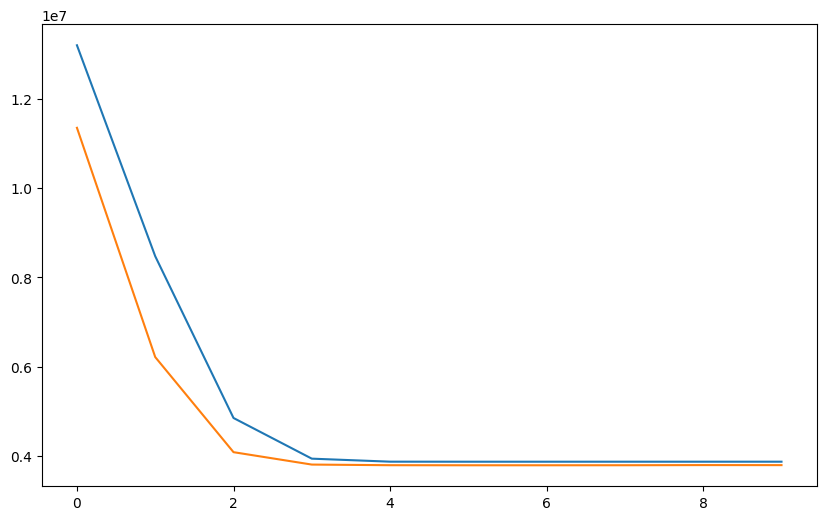

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: